# **Praktikum 5 MA2271 - Shift 3**
**10 Maret 2023**

Nama :                    \
NIM :



# **Nomor 1**

Perhatikan persamaan diferensial di bawah.

$$
u^{(4)} - 2u''' - 4u'' - u' = 0
$$

## **Nomor 1A**

Ubahlah persamaan diferensial tersebut menjadi sistem dari persamaan-persamaan diferensial orde satu. Lalu, tuliskan kembali sistem persamaan diferensial dalam bentuk $ \vec{\mathbf{u}}' = A\vec{\mathbf{u}} $.

**Jawab:**

Misalkan
$$
u_1 = u, \\
u_2 = u', \\
u_3 = u'', \\
u_4 = u''',
$$

maka
$$
u_1' = u', \\
u_2' = u'', \\
u_3' = u''', \\
u_4' = u^{(4)} = u' + 4u'' + 2u'''.
$$

Akibatnya, didapat sistem persamaan diferensial
$$
u_1' = u_2, \\
u_2' = u_3, \\
u_3' = u_4, \\
u_4' = u_2 + 4u_3 + 2u_4
$$

yang dapat dituliskan kembali sebagai
\begin{align*}
\begin{bmatrix}
u_1' \\
u_2' \\
u_3' \\
u_4'
\end{bmatrix}
&=
\begin{bmatrix}
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0 & 1 & 4 & 2
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 \\
u_3 \\
u_4
\end{bmatrix}
\end{align*}

## **Nomor 1B**

Tentukanlah pasangan eigen dari matriks $A$ yang telah Anda tentukan pada Nomor 1A.

In [ ]:
import numpy as np
import numpy.linalg as linalg
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Mendefinisikan matriks A
A = np.array([[0,1,0,0],[0,0,1,0],[0,0,0,1],[0,1,4,2]])
A

# Menentukan nilai dan vektor eigen dari A
eigval_A, eigvec_A = linalg.eig(A)

# Menentukan pasangan eigen dari A
for i in range(len(eigval_A)):
    eigval_i = eigval_A[i]
    eigvec_i = eigvec_A[:, i]
    print(f'Pasangan eigen ke {i+1} : \n{eigval_i},\n{eigvec_i.reshape(-1, 1)}')

Pasangan eigen ke 1 : 
0.0,
[[1.]
 [0.]
 [0.]
 [0.]]
Pasangan eigen ke 2 : 
3.3027756377319935,
[[-0.02645448]
 [-0.08737321]
 [-0.2885741 ]
 [-0.95309552]]
Pasangan eigen ke 3 : 
-0.30277563773199484,
[[ 0.95309552]
 [-0.2885741 ]
 [ 0.08737321]
 [-0.02645448]]
Pasangan eigen ke 4 : 
-1.0,
[[-0.5]
 [ 0.5]
 [-0.5]
 [ 0.5]]


## **Nomor 1C**

Tentukan solusi umum dan khusus dari persamaan diferensial tersebut menggunakan metode nilai eigen, jika diketahui $u(0) = 0$, $u'(0) = -1$, $u''(0) = 3$, dan $u'''(0) = -1$.

In [ ]:
from sympy import *
import sympy
sympy.init_printing()
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------
u1, u2, u3, u4 = symbols("u1 u2 u3 u4", cls = Function, Function = True)
t, C1, C2, C3, C4 = symbols("t C1 C2 C3 C4")

# Simpan nilai eigen
r1 = eigval_A[0]
r2 = eigval_A[1]
r3 = eigval_A[2]
r4 = eigval_A[3]

# Simpan vektor eigen
v1 = eigvec_A[:,0]
v2 = eigvec_A[:,1]
v3 = eigvec_A[:,2]
v4 = eigvec_A[:,3]

# Solusi umum
sol_u_u1 = Eq(u1(t), C1*exp(r1*t)*v1[0] + C2*exp(r2*t)*v2[0] +
            C3*exp(r3*t)*v3[0] + C4*exp(r4*t)*v4[0])
sol_u_u2 = Eq(u2(t), C1*exp(r1*t)*v1[1] + C2*exp(r2*t)*v2[1] +
            C3*exp(r3*t)*v3[1] + C4*exp(r4*t)*v4[1])
sol_u_u3 = Eq(u3(t), C1*exp(r1*t)*v1[2] + C2*exp(r2*t)*v2[2] +
            C3*exp(r3*t)*v3[2] + C4*exp(r4*t)*v4[2])
sol_u_u4 = Eq(u4(t), C1*exp(r1*t)*v1[3] + C2*exp(r2*t)*v2[3] +
            C3*exp(r3*t)*v3[3] + C4*exp(r4*t)*v4[3])
print('Solusi Umum:')
display(sol_u_u1)
display(sol_u_u2)
display(sol_u_u3)
display(sol_u_u4)

Solusi Umum:


In [ ]:
# Tulis solusi umum dalam array
soln_1 = np.array([sol_u_u1, sol_u_u2, sol_u_u3, sol_u_u4])

# Substitusi kondisi awal
cons = solve((soln_1[0].subs(t,0).subs(u1(0),0),
              soln_1[1].subs(t,0).subs(u2(0),-1),
              soln_1[2].subs(t,0).subs(u3(0),3),
              soln_1[3].subs(t,0).subs(u4(0),-1)), {C1,C2,C3,C4})

# Solusi khusus
sol_k_u1 = soln_1[0].rhs.subs(cons)
sol_k_u2 = soln_1[1].rhs.subs(cons)
sol_k_u3 = soln_1[2].rhs.subs(cons)
sol_k_u4 = soln_1[3].rhs.subs(cons)

print('Solusi Khusus:')
display(sol_k_u1)
display(sol_k_u2)
display(sol_k_u3)
display(sol_k_u4)

Solusi Khusus:


## **Nomor 1D**

Gambarkan $u(t)$, $u'(t)$, $u''(t)$, dan $u'''(t)$ dalam satu *figure* yang sama untuk $3 \leq t \leq 5$.

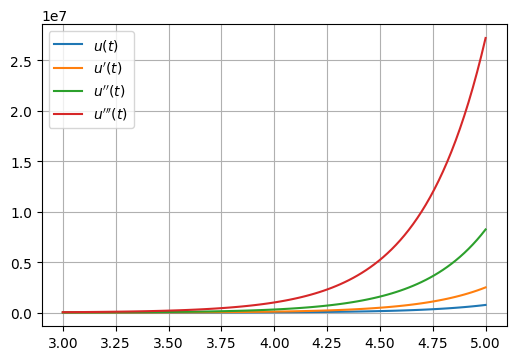

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

u1_func = lambdify(t, sol_k_u1)
u2_func = lambdify(t, sol_k_u2)
u3_func = lambdify(t, sol_k_u3)
u4_func = lambdify(t, sol_k_u4)

t1 = np.linspace(3,5,100)
plt.plot(t1, u1_func(t1), label='$u(t)$')
plt.plot(t1, u2_func(t1), label='$u\'(t)$')
plt.plot(t1, u3_func(t1), label='$u\'\'(t)$')
plt.plot(t1, u4_func(t1), label='$u\'\'\'(t)$')
plt.grid('on')
plt.legend()
plt.show()

# **Nomor 2**

Pernahkah Anda membaca buku klasik berjudul *Little Women* karya Louisa May Alcott ataupun menonton film adaptasinya? Salah satu hal yang menarik perhatian pembaca dan penonton dari cerita tersebut adalah hubungan Jo dan Laurie.

Asumsikan hubungan mereka mengikuti model *Love Affairs and Differential Equations* yang diusulkan oleh Strogatz (1988):

\begin{equation*}
\dfrac{dJ(t)}{dt}=aJ(t) + bL(t) \\
\dfrac{dL(t)}{dt}=cJ(t) + dL(t)
\end{equation*}

dengan $J(t)$ menyatakan perasaan Jo terhadap Laurie pada waktu $t$ dan $L(t)$ menyatakan sebaliknya. Secara umum, nilai positif menyatakan kecenderungan perasaan cinta, nilai negatif menyatakan kecenderungan perasaan benci, dan nilai nol menyatakan tidak adanya perasaan atau netral.

## **Nomor 2A**

Anggap hubungan ini memiliki nilai parameter $[a,b,c,d] = [-3,1,-3,5]$.

Diketahui pula bahwa pada awalnya, Laurie sempat mencintai Jo sehingga anggap perasaannya bernilai 2. Namun, berbeda dengan itu, Jo hanya melihat Laurie sebagai sahabat sekaligus saudara laki-laki yang tak pernah dimilikinya. Artinya, Jo tidak memiliki ketertarikan terhadap Laurie.

Berdasarkan informasi tersebut, tentukan solusi umum dan khusus untuk $J(t)$ dan $R(t)$ menggunakan perintah `dsolve`.

Solusi Umum:


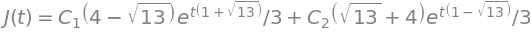

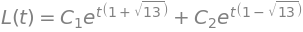

In [ ]:
from sympy import *
# Ketik jawaban Anda di bawah garis.
# -----------------------------------------------------------------------

J, L = symbols("J L", cls = Function, Fuction = True)
t, C1, C2 = symbols("t C1 C2")

# Parameter
a = -3
b = 1
c = -3
d = 5

# Definisikan sistem persamaan diferensial
eq1 = Eq(Derivative(J(t),t), a*J(t) + b*L(t))
eq2 = Eq(Derivative(L(t),t), c*J(t) + d*L(t))

# Solusi umum
soln_2 = dsolve((eq1, eq2))
print('Solusi Umum:')
display(soln_2[0])
display(soln_2[1])

In [ ]:
# Substitusi kondisi awal
cons_2 = solve((soln_2[0].subs(t,0).subs(J(0),0),
              soln_2[1].subs(t,0).subs(L(0),2)), {C1,C2})

# Solusi khusus
sol_J = soln_2[0].rhs.subs(cons_2)
sol_L = soln_2[1].rhs.subs(cons_2)

print('Solusi Khusus:')
display(sol_J)
display(sol_L)

Solusi Khusus:


## **Nomor 2B**

Gambarkan bidang fasa perasaan Laurie terhadap perasaan Jo pada domain $[0,5] \times [0,5]$.

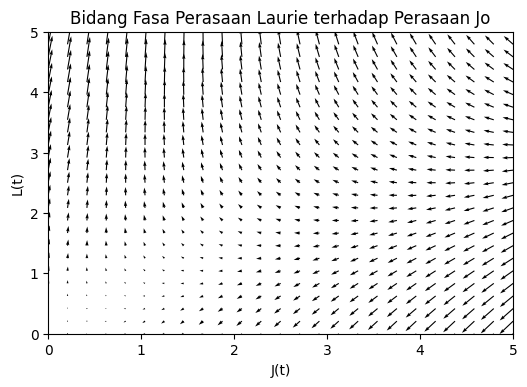

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------

# Buat vektor koordinat J dan L
J_s = np.linspace(0,5,25)
L_s = np.linspace(0,5,25)

# Buat matriks koordinat
J_s, L_s = np.meshgrid(J_s, L_s)

plt.quiver(J_s, L_s, a*J_s+b*L_s, c*J_s+d*L_s)
plt.xlabel('J(t)')
plt.ylabel('L(t)')
plt.xlim([0,5])
plt.ylim([0,5])
plt.title('Bidang Fasa Perasaan Laurie terhadap Perasaan Jo')
plt.show()

## **Nomor 2C**

Gambarkan dinamika perasaan Jo dan Laurie terhadap waktu.

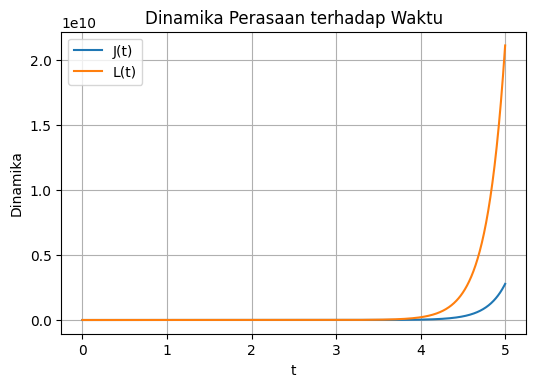

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
# Ketik jawaban Anda dibawah garis.
# -----------------------------------------------------------------------
J_func = lambdify(t, sol_J)
L_func = lambdify(t, sol_L)

t2 = np.linspace(0,5,1000)
plt.plot(t2,J_func(t2), label = 'J(t)')
plt.plot(t2,L_func(t2), label = 'L(t)')
plt.xlabel('t')
plt.ylabel('Dinamika')
plt.title('Dinamika Perasaan terhadap Waktu')
plt.grid('on')
plt.legend()
plt.show()

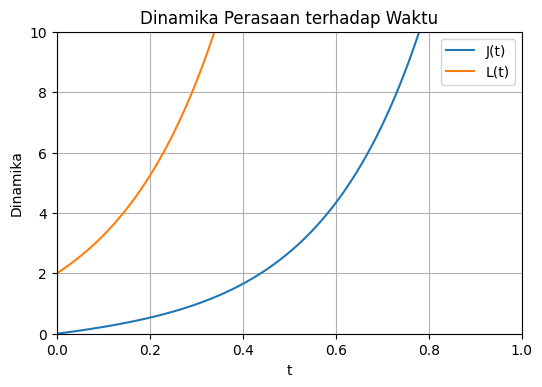

In [ ]:
# Plot dengan penyesuaian interval
plt.plot(t2,J_func(t2), label = 'J(t)')
plt.plot(t2,L_func(t2), label = 'L(t)')
plt.xlabel('t')
plt.ylabel('Dinamika')
plt.xlim([0,1])
plt.ylim([0,10])
plt.title('Dinamika Perasaan terhadap Waktu')
plt.grid('on')
plt.legend()
plt.show()

## **Nomor 2D**

Berdasarkan potret fasa dan kurva solusi terhadap waktu, bagaimanakah perasaan Jo dan Laurie untuk jangka waktu yang lama?

**Jawab:**

Jo yang awalnya tidak tertarik terhadap Laurie jadi mulai memiliki perasaan. Perasaan keduanya bertumbuh secara eksponensial untuk waktu yang lama. Meskipun demikian, Laurie tetap memiliki perasaan yang lebih besar dibanding perasaan Jo.